## Quick Color Checks

When I found myself doing analysis on color using `numpy`, I kept getting turned around and having trouble conceptualizing the color representation for the R, G, B values I was seeing.

`PIL` makes this really easy to do. All you have to do is call `Image.new()` and specify the `color` parameter accordingly.

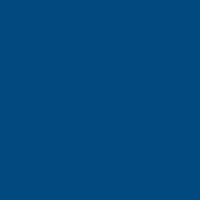

In [1]:
from PIL import Image

rect = Image.new(mode='RGB', size=(200, 200),
                 color=(0, 74, 127))
rect

## Layering in More Colors

If we wanted to look at more colors than one at a time, we could probably leverage some `matplotlib` "span" method, or use the built-in tools that `PIL` provides.

Specifically, we'll leverage the `ImageDraw.Draw` object, which takes an existing `Image` object.

In [2]:
from PIL import ImageDraw

In [3]:
drawer = ImageDraw.Draw(rect)

Which gives us access to a ton of simple drawing utillities.

In [4]:
print([x for x in dir(drawer) if x[0] != '_'])

['arc', 'bitmap', 'chord', 'draw', 'ellipse', 'fill', 'font', 'fontmode', 'getfont', 'im', 'ink', 'line', 'mode', 'multiline_text', 'multiline_textsize', 'palette', 'pieslice', 'point', 'polygon', 'rectangle', 'shape', 'text', 'textsize']


Note how we leverage the `rectangle()` method below.

In [5]:
def draw_rectangle(color_list):
    '''
    Make a long rectangle, composed of the colors
    detailed in color_list, a list of (R, G, B) tuples
    '''
    n = len(color_list)

    im = Image.new('RGBA', (100*n, 100))
    draw = ImageDraw.Draw(im)

    for idx, color in enumerate(color_list):
        # ensure that numbers are all ints
        color = tuple([int(x) for x in color])
        
        # draw the colors by array-indexing
        draw.rectangle([(100*idx, 0), (100*(idx+1), 100*(idx+1))],
                       fill=tuple(color))

    return im

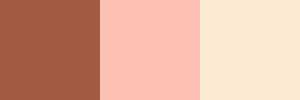

In [6]:
neapolitan = ([161, 91, 65],
              [252, 192, 181],
              [251, 233, 209])

draw_rectangle(neapolitan)